### Naive Bayes

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize']=(15,10)
plt.style.use('classic')

In [11]:
df = pd.read_csv('../data/Iris.csv')
df = df.rename(index=str, columns={"Species": "Class"})

In [12]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
df['Class'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Class, dtype: int64

C:\Users\Murilo\Anaconda3\envs\py37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


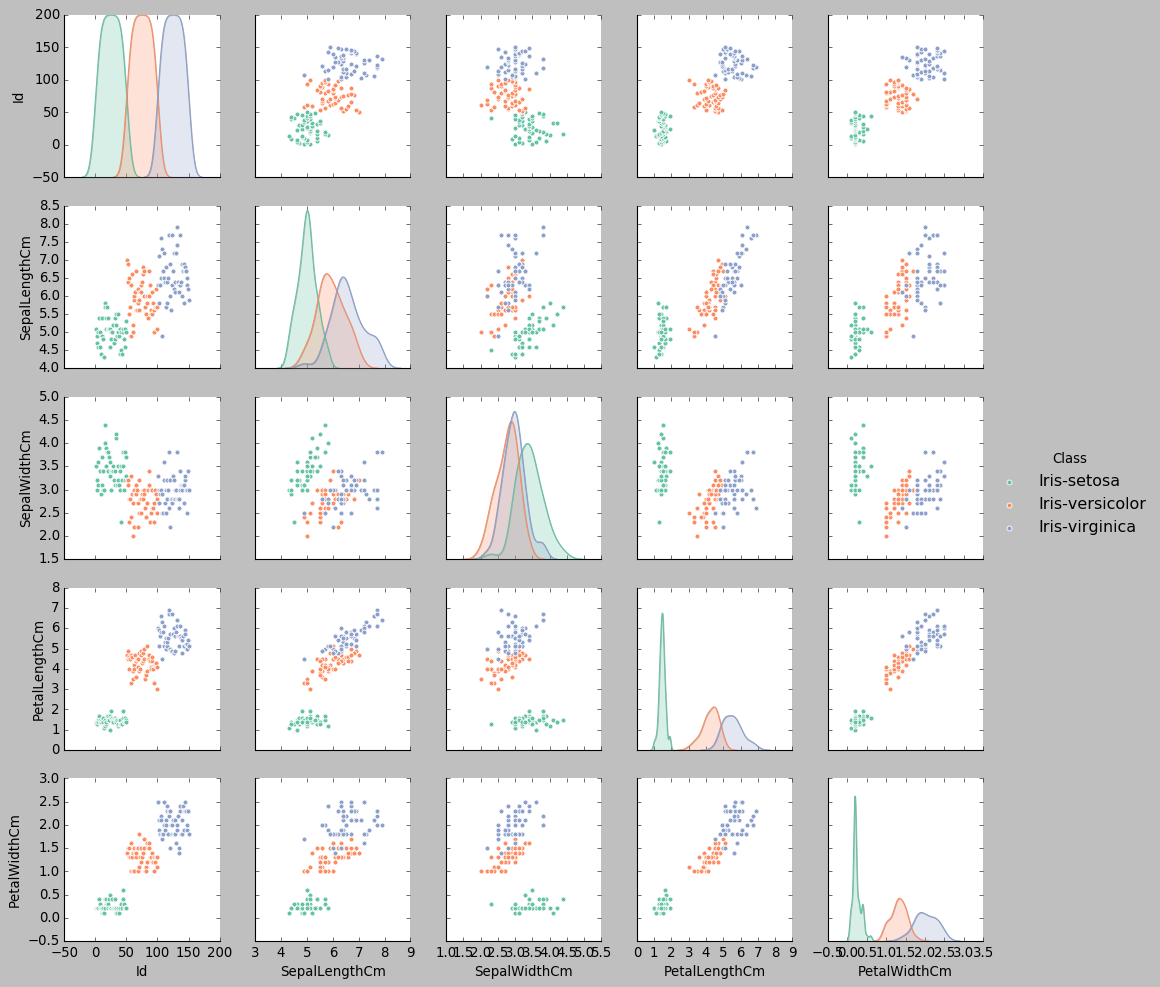

In [19]:
sns.pairplot(df,hue='Class',palette='Set2')

In [24]:
target_names_iris = ['setosa', 'versicolor', 'virginica']

X = df.drop(['SepalWidthCm','PetalWidthCm','Class','Id'],axis=1).values
y = df['Class'].values

from sklearn.preprocessing import LabelEncoder
labelencoder_forecast = LabelEncoder()
y = labelencoder_forecast.fit_transform(y)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

# training the model on training set 

gnb = GaussianNB() 
gnb.fit(X_train, y_train) 

# making predictions on the testing set 
y_pred = gnb.predict(X_test)

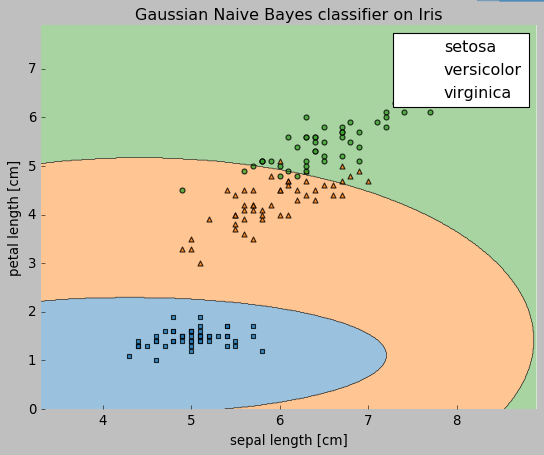

In [29]:
#Decision regions in 2D
from mlxtend.plotting import plot_decision_regions

#Plotting decision regions
plot_decision_regions(X, y, clf=gnb, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Gaussian Naive Bayes classifier on Iris')
plt.legend(target_names_iris)
plt.show()

In [30]:
print(classification_report(y_test,y_pred ))
# comparing actual response values (y_test) with predicted response values (y_pred) 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        18
           2       0.93      1.00      0.96        13

   micro avg       0.98      0.98      0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Gaussian Naive Bayes model accuracy(in %): 97.77777777777777
[[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]
